# Team HaQ 

## HaQ Score Calculation

HaQ score of individual tweets is the probability that the model predicts of a tweet being fake.

After calculating the HaQ score using the QML model, aggregation is done to calculate the HaQ score of each user. This is done based on the following formula:

<img src="img/haq_formula.png"/>

We can demonstrate how HaQ score changes acocrding to the user's number of tweets and their HaQ score.

We need first to import the necessary libraries and then calculate the product inside

In [1]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

def calc_score_mult(scores):
    mult = 1
    for i in range(len(scores)):
        mult *= scores[i]**(1/(i+1))
    return mult

We will now consider two cases, a total number of tweets being 12 and a total number of 2000.

In each case, we will see how the user's overall HaQ score change according to the user's average tweets HaQ score.

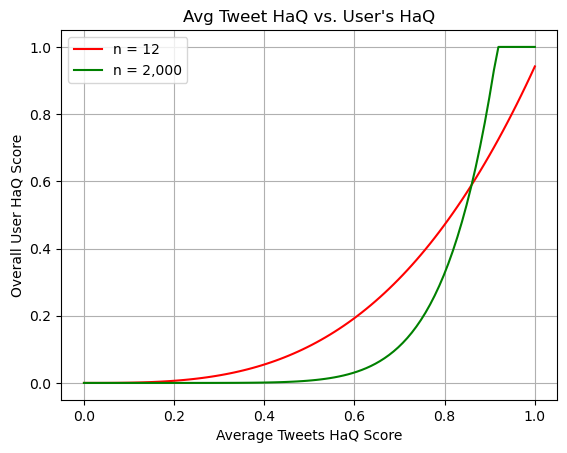

In [2]:


avgs = np.linspace(0, 1, 100)

scores1 = []
N1 = 12

for avg in avgs:
    ts = np.zeros(N1) + avg
    score = min(1, log(log(N1+1))*calc_score_mult(ts))
    scores1.append(score)

scores2 = []
N2 = 2_000

for avg in avgs:
    ts = np.zeros(N2) + avg
    score = min(1, log(log(N2+1))*calc_score_mult(ts))
    scores2.append(score)

plt.plot(avgs, scores1, c='red', label='n = 12')
plt.plot(avgs, scores2, c='green', label = 'n = 2,000')

plt.xlabel('Average Tweets HaQ Score')
plt.ylabel('Overall User HaQ Score')
plt.title("Avg Tweet HaQ vs. User's HaQ")

plt.legend()
plt.grid(True)

plt.savefig("graphs/haq_score.png")

plt.show()